# It is a very easy project which simply uses Linear Regression to predict house prices. Also Comapring accuracy by removing any feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
usa_housing=pd.read_csv("E:/data science/python/New folder/USA_Housing.csv")

In [3]:
usa_housing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
usa_housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
usa_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


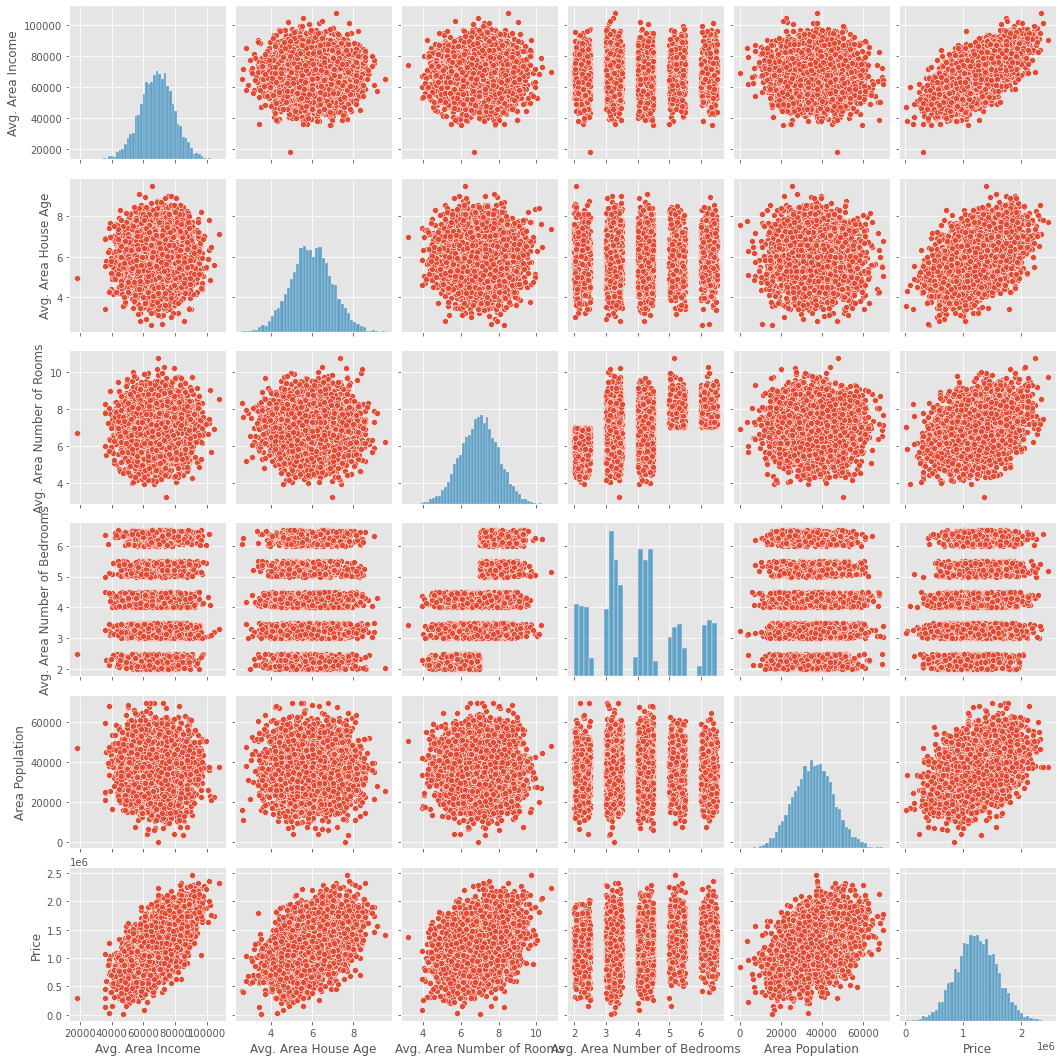

In [6]:
sns.pairplot(usa_housing)

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Price'>

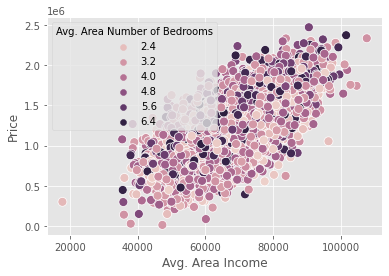

In [7]:
sns.scatterplot(data=usa_housing,x="Avg. Area Income",y="Price",hue="Avg. Area Number of Bedrooms",s=80)

<AxesSubplot:>

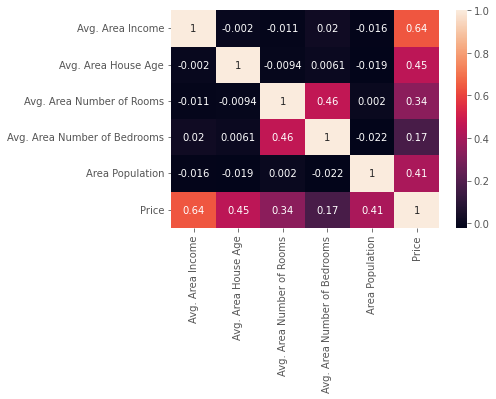

In [8]:
sns.heatmap(usa_housing.corr(),annot=True)

# Price is highly corealeted to avg. area incom

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
x=usa_housing.drop(['Price','Address'],axis=1)
cols=x.columns

In [11]:
y=usa_housing['Price']

In [12]:
sc=StandardScaler()

In [13]:
x=sc.fit_transform(x)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr=LinearRegression()

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred=lr.predict(x_test)
y_pred

array([ 970052.58260491,  953775.27541667,  907538.68823785, ...,
       1145731.54911866,  728720.80462904, 1102132.50135223])

In [20]:
lr.intercept_

1232189.3396087936

In [21]:
cdf=pd.DataFrame(lr.coef_, cols, ['coefficients']).sort_values('coefficients',ascending=False)
cdf

,coefficients
Avg. Area Income,231262.500663
Avg. Area House Age,164287.531010
Area Population,151186.825140
Avg. Area Number of Rooms,121655.229674
Avg. Area Number of Bedrooms,2540.298806


In [22]:
lr.coef_

array([231262.50066269, 164287.53101011, 121655.22967387,   2540.29880577,
       151186.82514015])

In [23]:
df1=pd.DataFrame({"Actual" : y_test,"Predicted":y_pred})

In [24]:
df1

,Actual,Predicted
398,8.942511e+05,9.700526e+05
3833,9.329794e+05,9.537753e+05
4836,9.207479e+05,9.075387e+05
4572,6.918549e+05,4.916051e+05
636,7.327332e+05,7.173316e+05
...,...,...
1458,1.591235e+06,1.731128e+06
1941,9.163443e+05,9.679916e+05
4882,1.197307e+06,1.145732e+06
1984,6.754898e+05,7.287208e+05


In [25]:
from sklearn import metrics

In [26]:
print(metrics.r2_score(y_test,y_pred)*100)

92.09976961306255


<AxesSubplot:xlabel='Price'>

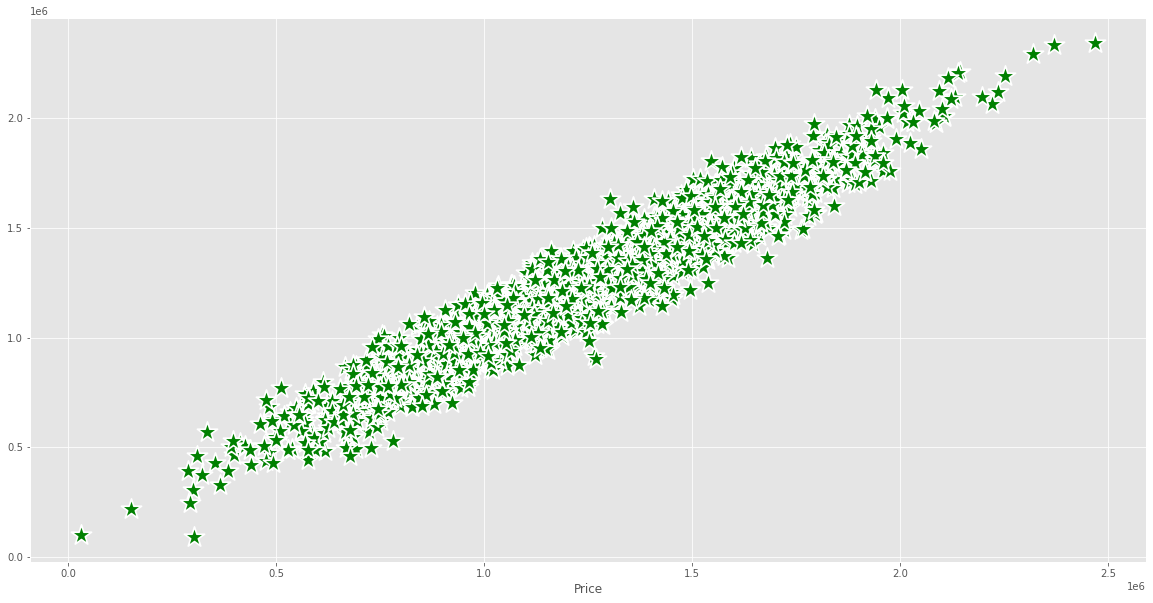

In [48]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=y_test, y=y_pred,marker='*',color='green',s=450)

<AxesSubplot:xlabel='Price', ylabel='Density'>

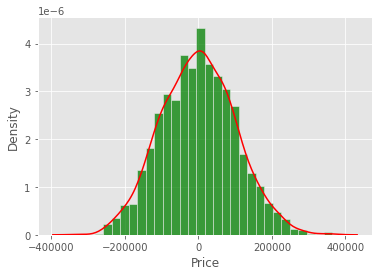

In [29]:
sns.histplot((y_test-y_pred), color='green', stat='density')
sns.kdeplot((y_test-y_pred), color='red')

# Checking by removing   Avg. Area Number of Bedrooms

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
x1=usa_housing.drop(['Price','Address','Avg. Area Number of Bedrooms'],axis=1)
cols=x1.columns

In [32]:
y1=usa_housing['Price']

In [33]:
sc=StandardScaler()

In [34]:
x1=sc.fit_transform(x1)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.35,random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm=LinearRegression()

In [39]:
lm.fit(x1_train,y1_train)

LinearRegression()

In [40]:
y1_pred=lm.predict(x1_test)
y1_pred

array([ 968501.90532851,  955644.69639818,  906429.26897501, ...,
       1148733.18251901,  730412.92132025, 1103234.52807404])

In [41]:
df2=pd.DataFrame({"Actual" : y_test,"Predicted":y_pred})
df2

,Actual,Predicted
398,8.942511e+05,9.700526e+05
3833,9.329794e+05,9.537753e+05
4836,9.207479e+05,9.075387e+05
4572,6.918549e+05,4.916051e+05
636,7.327332e+05,7.173316e+05
...,...,...
1458,1.591235e+06,1.731128e+06
1941,9.163443e+05,9.679916e+05
4882,1.197307e+06,1.145732e+06
1984,6.754898e+05,7.287208e+05


In [42]:
lm.intercept_

1232151.9676708963

In [43]:
from sklearn import metrics
print(metrics.r2_score(y1_test,y1_pred)*100)

92.10012906435838


<AxesSubplot:xlabel='Price'>

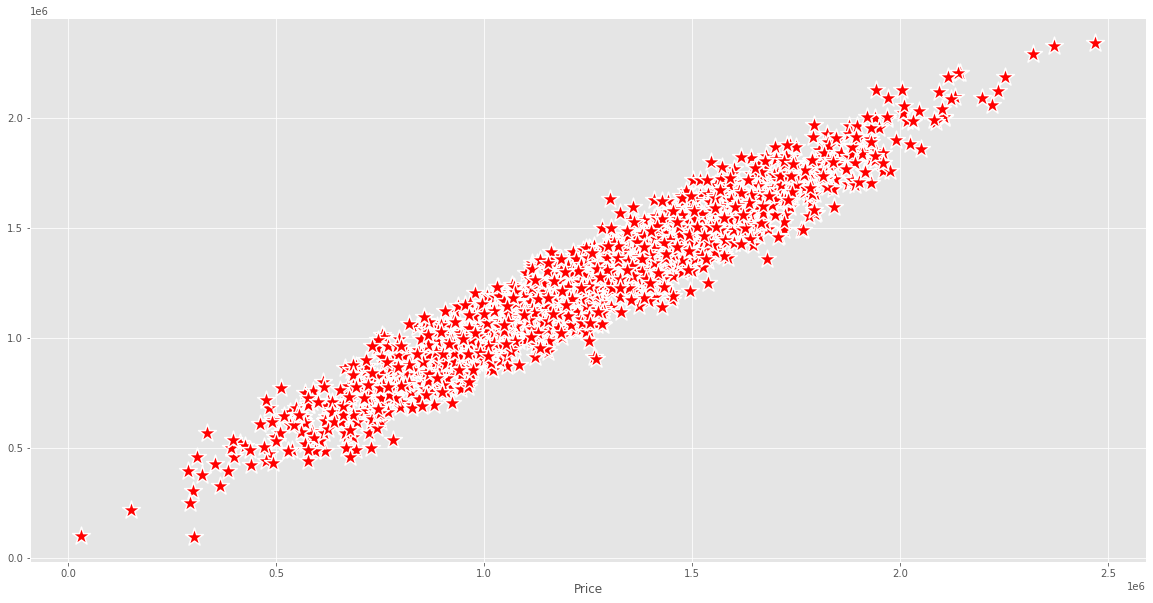

In [44]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=y1_test, y=y1_pred,color='red',s=350,marker='*')

<AxesSubplot:xlabel='Price', ylabel='Density'>

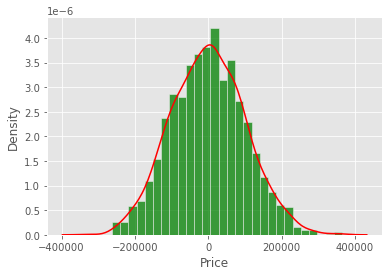

In [47]:
sns.histplot((y1_test-y1_pred), color='green', stat='density')
sns.kdeplot((y1_test-y1_pred), color='red')

In [46]:
cdf=pd.DataFrame(lm.coef_, cols, ['coefficients']).sort_values('coefficients',ascending=False)
cdf

,coefficients
Avg. Area Income,231342.860918
Avg. Area House Age,164308.372680
Area Population,151129.546958
Avg. Area Number of Rooms,122848.001836


By removing Avg. Area Number of Bedrooms we can conclude that there is very slight change in efficiency (from 92.09%  to 92.10%) by keeping test size same of our model.So that it is not necessary to involve 'Avg.Area Number of Bedrooms' feature in the model

Text(0, 0.5, 'PREDICTED VALUE')

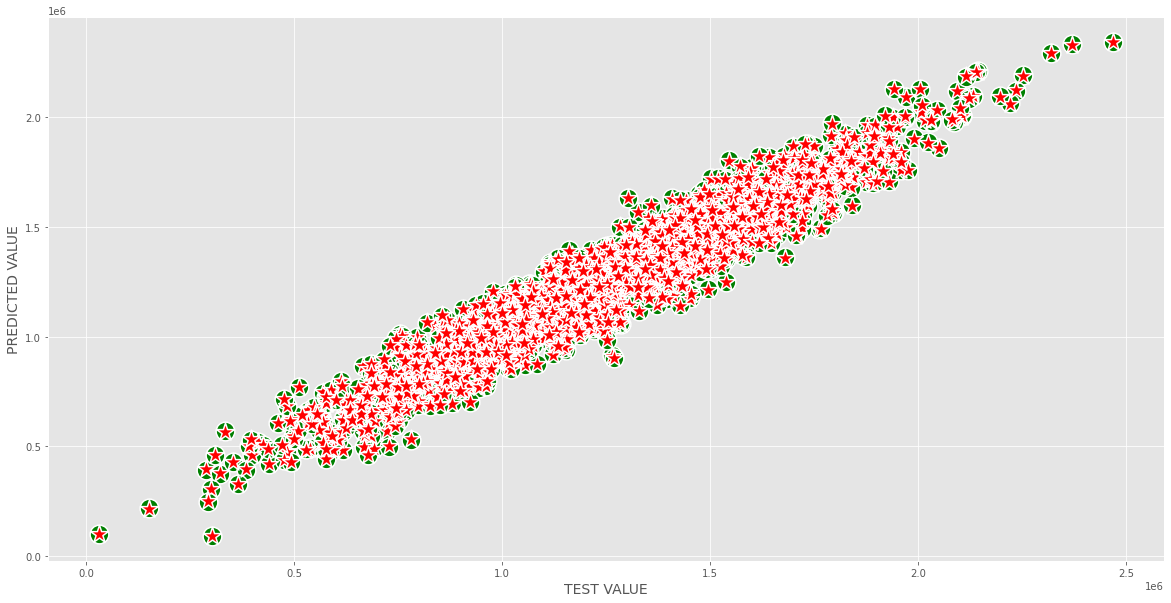

In [57]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=y_test, y=y_pred,marker='o',color='green',s=350)
sns.scatterplot(x=y1_test, y=y1_pred,color='red',s=350,marker='*')
plt.xlabel('TEST VALUE', fontsize=14)
plt.ylabel('PREDICTED VALUE', fontsize=14)